In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import astropy.units as u
from astropy.time import Time
from astroplan import Observer
pd.options.display.max_rows = 999

In [2]:
lat, lon = 23, 72
tz = 'Asia/Kolkata'
ahmedabad = Observer(latitude=lat*u.deg, longitude=lon*u.deg, elevation=0*u.m, timezone=tz)

In [10]:
def sunrise(observer, t):
    t_iso = Time(t.isoformat())
    rise = observer.sun_rise_time(t_iso)
    
    rise_time = datetime.datetime.strptime(rise.iso, '%Y-%m-%d %H:%M:%S.%f')
    rise_time += datetime.timedelta(hours=5, minutes=30)
    
    return rise_time

In [18]:
start_date = datetime.date(2018,1,1)
days = [start_date + datetime.timedelta(days=i) for i in range(365*2)]
rise_time = [sunrise(ahmedabad, day) for day in days]
just_rise_time = [t.time() for t in rise_time]

Text(0, 0.5, 'Sun rise time')

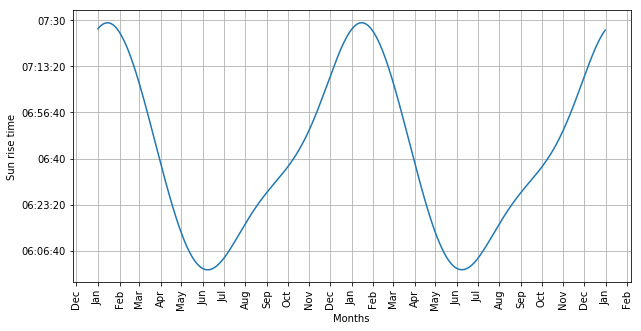

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')

plt.plot(days,just_rise_time)
plt.grid()
x_ = plt.gca().xaxis
x_.set_major_locator(locator)
x_.set_major_formatter(fmt)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sun rise time')

In [23]:
sunrise_pandas = [pd.Timestamp(str(t)) for t in rise_time]
df = pd.DataFrame({'day': days, 'sunrise': sunrise_pandas})
df['diff'] = df.sunrise.diff()

Text(0, 0.5, 'difference than eariler day')

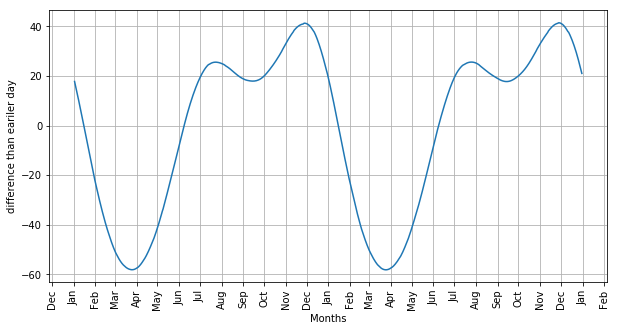

In [84]:
def calc_diff(a,b):
    d = a-b
    if d:
        if d<datetime.timedelta(days=1):
            d = datetime.timedelta(days=1) - d
            d = -(d.total_seconds())
        else:
            d = d - datetime.timedelta(days=1)
            d = (d.total_seconds())
    return d
    

diff = [calc_diff(t,s) for s,t in zip(rise_time, rise_time[1:])]
plt.plot(days[1:],diff)
plt.grid()
x_ = plt.gca().xaxis
x_.set_major_locator(locator)
x_.set_major_formatter(fmt)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('difference than eariler day')